<a href="https://colab.research.google.com/github/magumc/magumc.github.io/blob/main/Preprocesamiento_Fuga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre-procesamiento Fuga de Cliente


Los datos en el mundo real son sucios, es decir, estan incompletos, tienen inconsistencias y presentan ruido porque tienen valores atípicos.

Por esto, es necesario preparar los datos antes de trabajar con ellos porque sin datos de calidad es imposible obtener buenos resultados. En esto consiste el pre-procesamiento, preparar los datos para luego poder trabajar con ellos y aplicarle distintos algoritmos. 

Para partir descargamos las librerias a utilizar:

In [ ]:
!pip -q install numpy gensim scikit-learn

Importamos las librerias a trabajar

In [ ]:
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn

from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2


<ipython-input-2-ab3033263d9d>:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Subir un archivo de google drive

**Cuando corra la siguiente linea, le pedira un código, por favor siga las intrucciones a continuación, inserte el código entregado y presione enter**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Una vez cargado nuestro drive cargamos el o los archivos a utilizar

In [ ]:
ruta_data_set = '/content/gdrive/MyDrive/Colab Notebooks/Fundamentos Analytics/Tarea 1/Base_Fuga_2021.xlsx'
data_set = pd.read_excel(ruta_data_set)

Descripcion de variables de la base de datos:

1. FUGA: Variable objetivo. F=cliente fugado, NF= cliente activo

2. CreditMes T: Credito en mes T

3. CreditMes T-1: Credito en mes T − 1

4. CreditMes T-2: Credito en mes T − 2

5. NumTarjCred T: Numero de tarjetas de 
Credito en mes T

6. NumTarjCred T-1: Numero de tarjetas de Credito en mes T − 1

7. NumTarjCred T-2: Numero de tarjetas de Credito en mes T − 2

8. Ingreso: Ingreso cliente

9. Edad: Edad cliente

10. NumTransWeb T: Numero de transacciones en web en mes T

11. NumTransWeb T-1: Numero de transacciones en web en mes T-1

12. NumTransWeb T-2: Numero de transacciones en web en mes T-2

13. MargenComp T: Margen del cliente para la compañia en mes T

14. MargenComp T-1: Margen del cliente para la compañia en mes T-1

15. MargenComp T-2: Margen del cliente para la compañia en mes T-2

16. MargenComp T-3: Margen del cliente para la compañia en mes T-3

17. MargenComp T-4: Margen del cliente para la compañia en mes T-4

18. MargenComp T-5: Margen del cliente para la compañia en mes T-5

19. MargenComp T-6: Margen del cliente para la compañia en mes T-6

20. Telefono: La compañia posee el numero de Telefono del cliente

21. NivelEduc: Nivel Educacional del cliente

22. Genero: Genero del cliente

23. EstCivil: Estado civil del cliente

24. Region: Region donde vive el cliente



In [ ]:
type(data_set)

pandas.core.frame.DataFrame

# Análisis Exploratorio de Datos

El análisis exploratorio de datos (AED) consiste en examinar los datos para entenderlos de manera basica, ver las relaciones entre las variables analizadas y encontrar posibles inconsistencias en ellos, como datos atipicos y datos ausentes. 

Todo esto previo a la aplicacion de cualquier tecnica estadística.

Para esto se analiza la estadística descriptiva de la base de datos y los gráficos de las variables para ver su comportamiento.

## Estadística descriptiva

Para analizar el comportamiento de los datos de las variables numéricas, obtenemos la media, desviación estandar, mínimo, máximo y cuartiles.

Mientras que para las variables categóricas obtenemos la cantidad de categorias de la variable (unique), la moda (top) y la frecuencia de de la moda (freq). 

In [ ]:
data_set.describe(include='all') 

,CreditMes_T,CreditMes_T-1,CreditMes_T-2,NumTarjCred_T,NumTarjCred_T-1,NumTarjCred_T-2,Ingreso,Edad,NumTransWeb_T,NumTransWeb_T-1,...,MargenComp_T-3,MargenComp_T-4,MargenComp_T-5,MargenComp_T-6,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA
count,5.603000e+03,5.605000e+03,5.605000e+03,5598.000000,5603.000000,5605.000000,5.605000e+03,5605.000000,5603.000000,5603.000000,...,5605.000000,5603.000000,5604.000000,5605.000000,5605,5602,5605,5603,5605,5605
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,4,3,4,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SI,UNI,M,CAS,RM,NF
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5605,3627,3895,2960,5605,4889
mean,1.021485e+06,6.328121e+05,5.837963e+05,0.831011,0.829734,0.836931,1.223802e+06,35.916503,5.213100,3.929502,...,253053.634255,253046.635731,260956.359743,195991.500446,NaN,NaN,NaN,NaN,NaN,NaN
std,1.152165e+05,1.277336e+05,8.001650e+04,0.701989,0.716208,0.728113,5.622728e+05,9.217773,11.329756,8.499041,...,2472.393012,2546.577857,1653.431077,3001.585017,NaN,NaN,NaN,NaN,NaN,NaN
min,9.126500e+05,5.000000e+05,5.000000e+05,0.000000,0.000000,0.000000,-9.759500e+05,15.000000,0.000000,0.000000,...,100000.000000,157840.000000,183560.000000,137500.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.905000e+05,5.972000e+05,5.621000e+05,0.000000,0.000000,0.000000,8.904500e+05,29.000000,0.000000,0.000000,...,252840.000000,252960.000000,260800.000000,195380.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.977000e+05,6.048500e+05,5.661500e+05,1.000000,1.000000,1.000000,1.057650e+06,33.000000,0.000000,1.000000,...,252960.000000,253040.000000,260880.000000,195640.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.014800e+06,6.233000e+05,5.774000e+05,1.000000,1.000000,1.000000,1.362600e+06,41.000000,6.000000,5.000000,...,253260.000000,253320.000000,261100.000000,196420.000000,NaN,NaN,NaN,NaN,NaN,NaN


**Count:** En total se muestra informacion de 5605 clientes. 

**Variabes Categóricas**: Telefono, NivelEduc, Genero, EstCivil, Region

*Teléfono:* La compañía posee el número de teléfono de todos los clientes, por eso muestra solo 1 variable categorica("SI") que es la que siempre se repite (moda)

*NivelEduc:* Existen 4 categorías de nivel educacional y la que mas se repite (moda) es la Universitaria, 3627 veces.

*Genero:* 3 categorías de género. La que más se repite es el masculino  3895 veces. Existe una variable H que mas adelante veremos su tratamiento.

*EstCivil:* 4 categorías de estado civil. La que mas se repite es casado 2960 veces.

*Region*: Todos en la region metropolitana. Por eso muestra 1 sola categoría.

***Variable objetivo fuga***: Categórica, posee 2 categorías (cliente fugado: F, o activo: NF) siendo la que mas se repite el activo 4889 veces.

**Inconsistencias:**

Ingreso Negativo. Edad maxima 131 años (la persona mas longeva en Chile murio a los 121). Faltan algunos datos en las variables *CreditMes_T, NumTarjCred_T y T-1, NumTransWeb_T, MargenComp_T,T-1,T-4,T-5, NivelEduc y EstCivil.* 



In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditMes_T      5603 non-null   float64
 1   CreditMes_T-1    5605 non-null   int64  
 2   CreditMes_T-2    5605 non-null   int64  
 3   NumTarjCred_T    5598 non-null   float64
 4   NumTarjCred_T-1  5603 non-null   float64
 5   NumTarjCred_T-2  5605 non-null   int64  
 6   Ingreso          5605 non-null   int64  
 7   Edad             5605 non-null   int64  
 8   NumTransWeb_T    5603 non-null   float64
 9   NumTransWeb_T-1  5603 non-null   float64
 10  NumTransWeb_T-2  5605 non-null   int64  
 11  MargenComp_T     5603 non-null   float64
 12  MargenComp_T-1   5604 non-null   float64
 13  MargenComp_T-2   5605 non-null   int64  
 14  MargenComp_T-3   5605 non-null   int64  
 15  MargenComp_T-4   5603 non-null   float64
 16  MargenComp_T-5   5604 non-null   float64
 17  MargenComp_T-6

También podemos ver los datos que hay en cada variable, como se muestra a continuación:

In [ ]:
print(data_set) 

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2  Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050    30            1.0   
1                 0.0                0   830600    38          

Contamos los valores perdidos de cada variable para ver si existen valores nulos en ellas.

In [ ]:
data_set.isnull().sum()

CreditMes_T        2
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      7
NumTarjCred_T-1    2
NumTarjCred_T-2    0
Ingreso            0
Edad               0
NumTransWeb_T      2
NumTransWeb_T-1    2
NumTransWeb_T-2    0
MargenComp_T       2
MargenComp_T-1     1
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     2
MargenComp_T-5     1
MargenComp_T-6     0
Telefono           0
NivelEduc          3
Genero             0
EstCivil           2
Region             0
FUGA               0
dtype: int64

In [ ]:
data_set.std()

<ipython-input-10-edead36a4e25>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_set.std()


CreditMes_T        115216.528955
CreditMes_T-1      127733.568081
CreditMes_T-2       80016.499402
NumTarjCred_T           0.701989
NumTarjCred_T-1         0.716208
NumTarjCred_T-2         0.728113
Ingreso            562272.775876
Edad                    9.217773
NumTransWeb_T          11.329756
NumTransWeb_T-1         8.499041
NumTransWeb_T-2        10.216828
MargenComp_T         2037.071926
MargenComp_T-1       2409.850145
MargenComp_T-2       1967.151050
MargenComp_T-3       2472.393012
MargenComp_T-4       2546.577857
MargenComp_T-5       1653.431077
MargenComp_T-6       3001.585017
dtype: float64

## Gráficos

Los gráficos nos permiten identificar patrones bivareados, visualizar los datos y valores atípicos. Algunos ejemplos de ellos son los que se muestran a continuación 

Histograma estándar

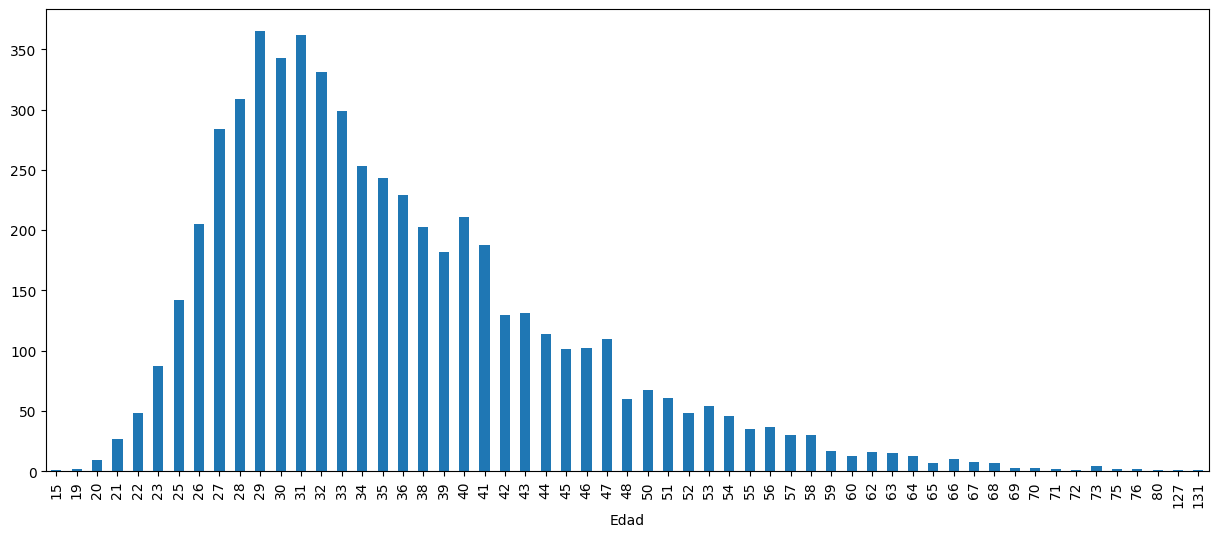

In [ ]:
data_set['Edad'].value_counts().sort_index().plot.bar(figsize=(15,6))
plt.xlabel('Edad')
plt.show()

*Observamos dos edades fuera de lo normal. 127 y 131 anos*

Histograma de puntos para visualizar valores atípicos (outliers). EN este caso en los ingresos.

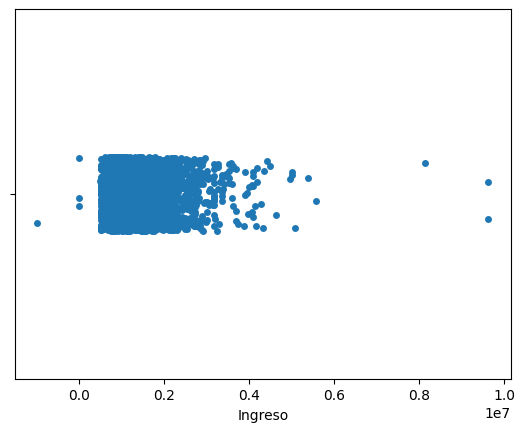

In [ ]:
sn.stripplot(x='Ingreso', data=data_set) 
plt.show()

*Vemos Ingresos negativos y aprox 3 que son muy altos, 8 millones y cerca de 10 millones*

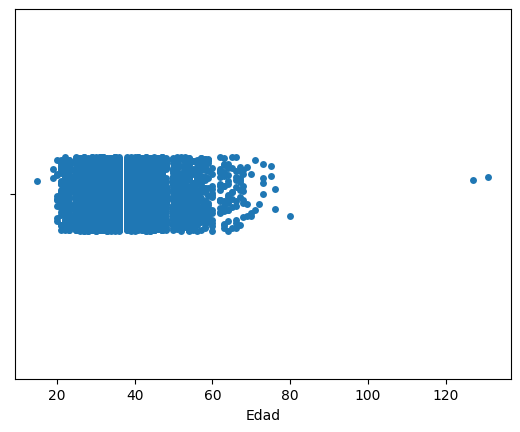

In [ ]:
sn.stripplot(x='Edad', data=data_set) 
plt.show()

Histograma color, para ver relevancia de la variable objetivo en los valores de una variable.

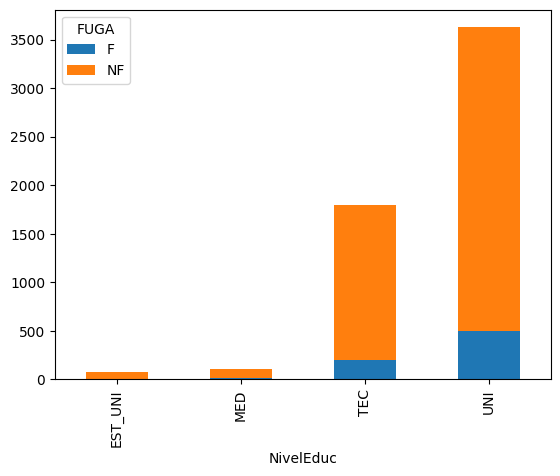

In [ ]:
data_set.groupby(['NivelEduc', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.show()

la mayoria de los clientes que acceden a credito son los que tienen educacion superior

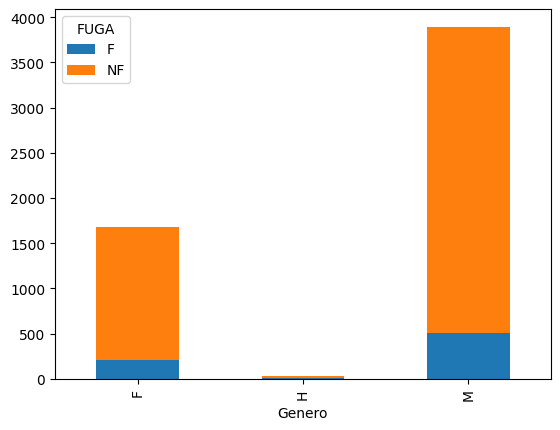

In [ ]:
data_set.groupby(['Genero', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.show()

Intentaremos reemplazar el genero H por sexo masculino

In [ ]:
data_set['Genero'] = data_set['Genero'].replace('H', 'M')

Graficando

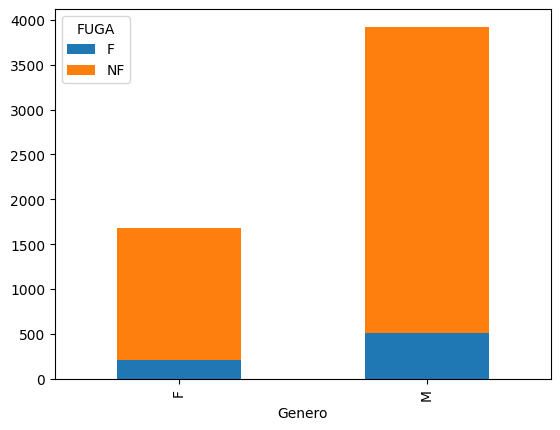

In [ ]:
data_set.groupby(['Genero', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.show()

La mayoria de los que tiene credito son de sexo masculino. De hecho mas del doble lo son.

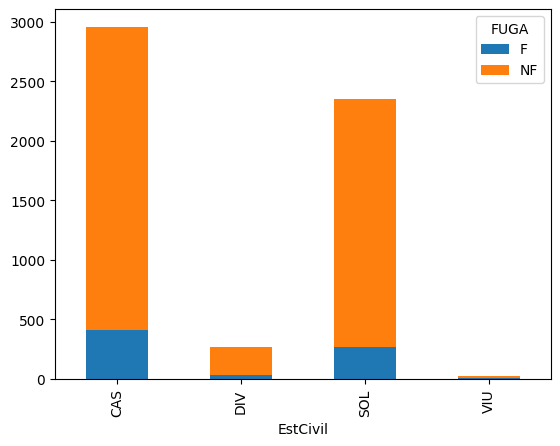

In [ ]:
data_set.groupby(['EstCivil', 'FUGA']).size().unstack().plot.bar(stacked=True)
plt.show()

acceden los casados y solteros principalmente

También podemos hacer el histograma color con proporciones.

<ipython-input-19-a46a3b6feae4>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_set.groupby(['NivelEduc', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


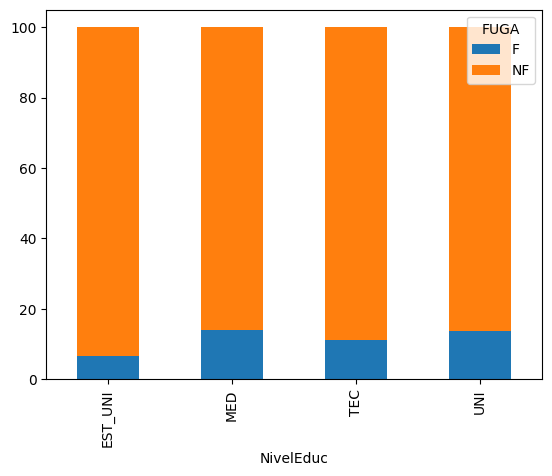

<ipython-input-19-a46a3b6feae4>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_set.groupby(['EstCivil', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


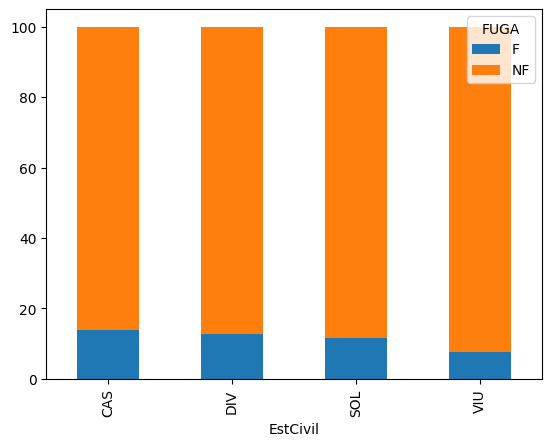

<ipython-input-19-a46a3b6feae4>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_set.groupby(['Genero', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True)


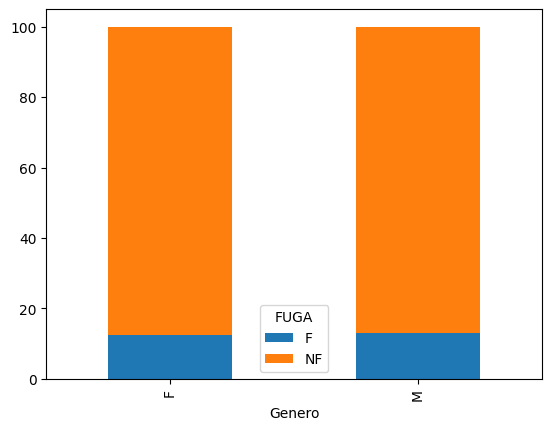

In [ ]:
data_set.groupby(['NivelEduc', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True) 
plt.show()
data_set.groupby(['EstCivil', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True) 
plt.show()
data_set.groupby(['Genero', 'FUGA']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot.bar(stacked=True) 
plt.show()

Independiente del estado civil o el genero, existe la misma proporcion entre los que se fugan y los que no. Similar a lo que pasa en Nivel educacional, a excepcion de los estudiantes universitarios.

Box plot edad e ingreso VS fuga


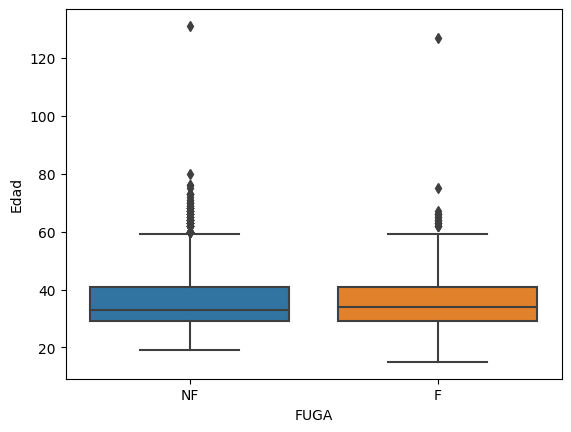

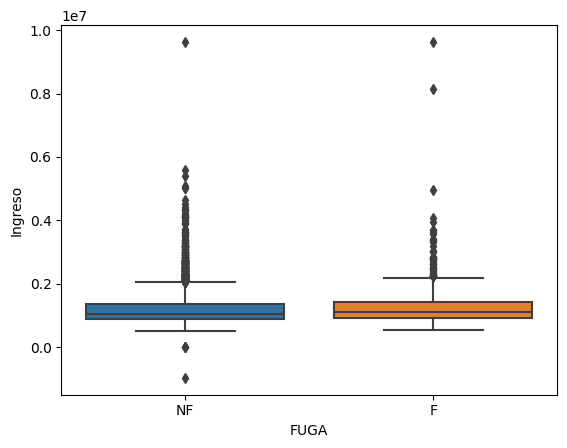

In [ ]:
sn.boxplot(x="FUGA", y="Edad", data=data_set) 
plt.show()
sn.boxplot(x="FUGA", y="Ingreso", data=data_set) 
plt.show()

Las personas que se fugan y no se fugan tiene el mismo rango de edad. Pasa lo mismo con los ingresos. De hecho estan bien concentrados entre el 1 y 1.5 millones de pesos en ingresos y entre los 30 y 40 anos de edad


In [ ]:
print(data_set)

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2  Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050    30            1.0   
1                 0.0                0   830600    38          

# Limpieza de datos

La limpieza de datos es eliminar las incongruencias encontradas en el análisis exploratorio de datos, como valores perdidos y valores atipicos, para poder trabajar la base de datos sin que estos alteren los resultados. 

Primero declaramos los valores atípicos como valores perdidos (inconsistencias) y luego los trabajamos (imputar valores perdidos).


## Inconsistencias

Eliminamos las variables telefonos y Region que no son necesarias para el modelo

Declaramos los valores que estan fuera de rango como valores perdidos, para poder identificarlos. Los pongo nulo

In [ ]:
data_set.loc[data_set['Ingreso'] < 0, ['Ingreso']] = np.nan
data_set.loc[data_set['Edad'] > 100, ['Edad']] = np.nan

In [ ]:
print(data_set)

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2    Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050.0  30.0            1.0   
1                 0.0                0   830600.0  38.0    

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditMes_T      5603 non-null   float64
 1   CreditMes_T-1    5605 non-null   int64  
 2   CreditMes_T-2    5605 non-null   int64  
 3   NumTarjCred_T    5598 non-null   float64
 4   NumTarjCred_T-1  5603 non-null   float64
 5   NumTarjCred_T-2  5605 non-null   int64  
 6   Ingreso          5604 non-null   float64
 7   Edad             5603 non-null   float64
 8   NumTransWeb_T    5603 non-null   float64
 9   NumTransWeb_T-1  5603 non-null   float64
 10  NumTransWeb_T-2  5605 non-null   int64  
 11  MargenComp_T     5603 non-null   float64
 12  MargenComp_T-1   5604 non-null   float64
 13  MargenComp_T-2   5605 non-null   int64  
 14  MargenComp_T-3   5605 non-null   int64  
 15  MargenComp_T-4   5603 non-null   float64
 16  MargenComp_T-5   5604 non-null   float64
 17  MargenComp_T-6

In [ ]:
data_set.isnull().sum()

CreditMes_T        2
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      7
NumTarjCred_T-1    2
NumTarjCred_T-2    0
Ingreso            1
Edad               2
NumTransWeb_T      2
NumTransWeb_T-1    2
NumTransWeb_T-2    0
MargenComp_T       2
MargenComp_T-1     1
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     2
MargenComp_T-5     1
MargenComp_T-6     0
Telefono           0
NivelEduc          3
Genero             0
EstCivil           2
Region             0
FUGA               0
dtype: int64

*Vemos que se ingresó 1 valor nulo en el ingreso y 2 valores nulos en la edad*

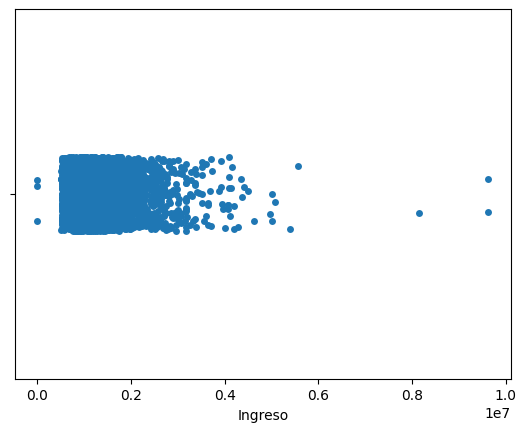

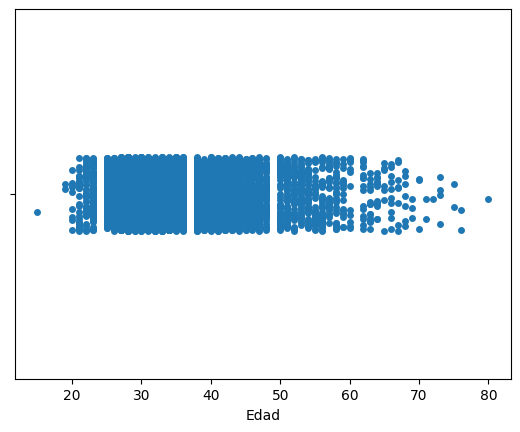

In [ ]:
sn.stripplot(x='Ingreso', data=data_set) 
plt.show()
sn.stripplot(x='Edad', data=data_set) 
plt.show()

## Imputar valores perdidos

Ahora tenemos que trabajar estos valores perdidos, para eso tenemos 3 alternativas:

**Alternativa 1: Remplazo por mediana / moda**

Esta alternativa la utilizamos cuando los valores perdidos son menores al 5% del total de los datos y consiste en remplazar los valor perdidos por la media / moda. Pero esto tiene la desventaja de que alteramos los resultados.

Reemplazamos Variables numericas nulas por la media

In [ ]:
data_set['CreditMes_T'].fillna(data_set['CreditMes_T'].median(skipna =True), inplace=True)
data_set['NumTarjCred_T'].fillna(data_set['NumTarjCred_T'].median(skipna =True), inplace=True)
data_set['NumTarjCred_T-1'].fillna(data_set['NumTarjCred_T-1'].median(skipna =True), inplace=True)
data_set['MargenComp_T'].fillna(data_set['MargenComp_T'].median(skipna =True), inplace=True)
data_set['MargenComp_T-1'].fillna(data_set['MargenComp_T-1'].median(skipna =True), inplace=True)
data_set['MargenComp_T-4'].fillna(data_set['MargenComp_T-4'].median(skipna =True), inplace=True)
data_set['MargenComp_T-5'].fillna(data_set['MargenComp_T-5'].median(skipna =True), inplace=True)
data_set['Ingreso'].fillna(data_set['Ingreso'].median(skipna =True), inplace=True)
data_set['Edad'].fillna(data_set['Edad'].median(skipna =True), inplace=True)
data_set['NumTransWeb_T'].fillna(data_set['NumTransWeb_T'].median(skipna =True), inplace=True)
data_set['NumTransWeb_T-1'].fillna(data_set['NumTransWeb_T-1'].median(skipna =True), inplace=True)

Reemplazamos Variables categóricas nulas por la moda

In [ ]:
mode = data_set['NivelEduc'].mode()
data_set['NivelEduc'].fillna(mode[0], inplace=True)
mode = data_set['EstCivil'].mode()
data_set['EstCivil'].fillna(mode[0], inplace=True)

Verificamos si falta algun dato

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditMes_T      5605 non-null   float64
 1   CreditMes_T-1    5605 non-null   int64  
 2   CreditMes_T-2    5605 non-null   int64  
 3   NumTarjCred_T    5605 non-null   float64
 4   NumTarjCred_T-1  5605 non-null   float64
 5   NumTarjCred_T-2  5605 non-null   int64  
 6   Ingreso          5605 non-null   float64
 7   Edad             5605 non-null   float64
 8   NumTransWeb_T    5605 non-null   float64
 9   NumTransWeb_T-1  5605 non-null   float64
 10  NumTransWeb_T-2  5605 non-null   int64  
 11  MargenComp_T     5605 non-null   float64
 12  MargenComp_T-1   5605 non-null   float64
 13  MargenComp_T-2   5605 non-null   int64  
 14  MargenComp_T-3   5605 non-null   int64  
 15  MargenComp_T-4   5605 non-null   float64
 16  MargenComp_T-5   5605 non-null   float64
 17  MargenComp_T-6

In [ ]:
data_set.isnull().sum()

CreditMes_T        0
CreditMes_T-1      0
CreditMes_T-2      0
NumTarjCred_T      0
NumTarjCred_T-1    0
NumTarjCred_T-2    0
Ingreso            0
Edad               0
NumTransWeb_T      0
NumTransWeb_T-1    0
NumTransWeb_T-2    0
MargenComp_T       0
MargenComp_T-1     0
MargenComp_T-2     0
MargenComp_T-3     0
MargenComp_T-4     0
MargenComp_T-5     0
MargenComp_T-6     0
Telefono           0
NivelEduc          0
Genero             0
EstCivil           0
Region             0
FUGA               0
dtype: int64

No falta ninguno. Revisamos el histograma de edad si cambio mucho

Text(0.5, 0, 'Edad')

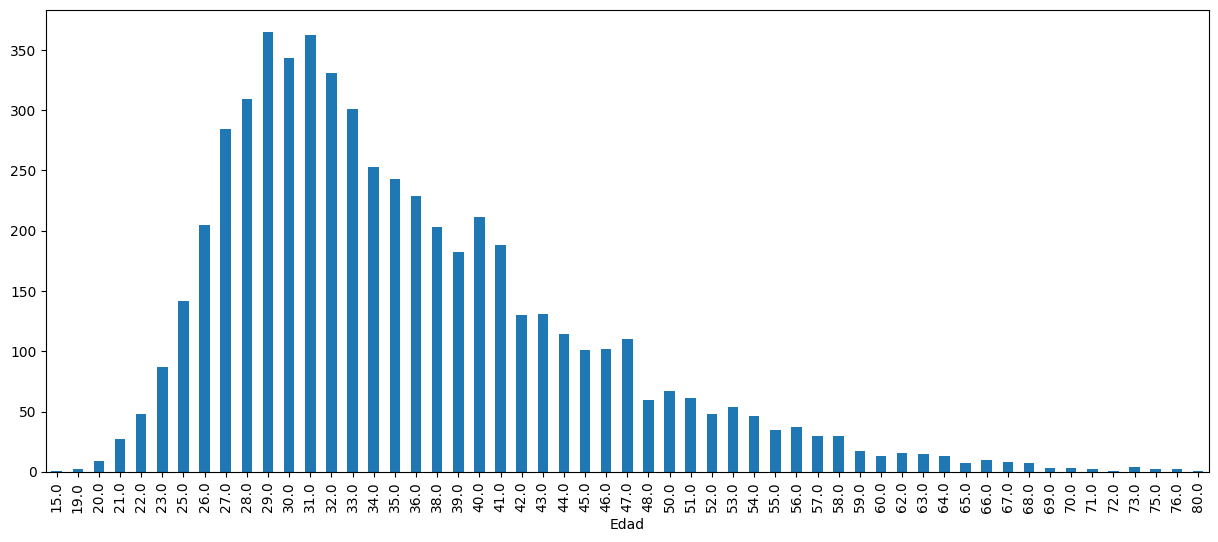

In [ ]:
data_set['Edad'].value_counts().sort_index().plot.bar(figsize=(15,6))
plt.xlabel('Edad')

Esta practicamente igual que antes.

**Alternativa 2: Eliminación de casos**

Esta alternativa tambien la utilizamos cuando los valores perdidos son menores al 5% del total de los datos y consiste en eliminar todas las filas donde haya algun valor nulo. Esta no altera los resultados pero pierde la información de las demás variables en esa fila. Por esa razon no se aplica este metodo

**Alternativa 3: Imputación múltiple**

La imputación múltiple consiste en simular el comportamiento de los datos y a partir de esto remplazar los valores perdidos por los datos simulados. Esta última alternativa la utilizamos cuando los valores perdidos son menores al 30% del total de los datos. Como no son tantos los valores perdidos, omitimos tambien este metodo.

# Transformación

La transformación de datos consiste en mejorar el valor predictivo de una variable, dar sentido matemático a las variables, agrupar datos y mejorar la capacidad de discriminación de una variable.

In [ ]:
print(data_set)

      CreditMes_T  CreditMes_T-1  CreditMes_T-2  NumTarjCred_T  \
0       1031900.0         666500         608000            2.0   
1       1078700.0         634100         583250            0.0   
2       1076000.0         708800         621950            1.0   
3        995450.0         599900         564350            1.0   
4       1052150.0         609800         572450            1.0   
...           ...            ...            ...            ...   
5600     989600.0         596300         561650            0.0   
5601     990050.0         597200         562100            1.0   
5602     990050.0         596750         562100            0.0   
5603     990500.0         596750         562100            0.0   
5604     990500.0         597200         562100            2.0   

      NumTarjCred_T-1  NumTarjCred_T-2    Ingreso  Edad  NumTransWeb_T  \
0                 2.0                2  1050050.0  30.0            1.0   
1                 0.0                0   830600.0  38.0    

## Transformacion de variables a su promedio

Calcularemos el promedio de los ultimos meses de credito, de numero de tarjetas de credito, margen y numero de transacciones

In [ ]:
data_set['AvrCredit'] = data_set[['CreditMes_T','CreditMes_T-1','CreditMes_T-2']].mean(axis=1)
data_set['AvrTarj'] = data_set[['NumTarjCred_T','NumTarjCred_T-1', 'NumTarjCred_T-2']].mean(axis=1)
data_set['AvrTrans'] = data_set[['NumTransWeb_T',	'NumTransWeb_T-1','NumTransWeb_T-2']].mean(axis=1)
data_set['AvrMarg'] = data_set[['MargenComp_T','MargenComp_T-1','MargenComp_T-2','MargenComp_T-3','MargenComp_T-4','MargenComp_T-5','MargenComp_T-6']].mean(axis=1)

Eliminamos las columnas desde la cuales sacamos el promedio

In [ ]:
del data_set['NumTarjCred_T']
del data_set['NumTarjCred_T-1']
del data_set['NumTarjCred_T-2']
del data_set['CreditMes_T']
del data_set['CreditMes_T-1']
del data_set['CreditMes_T-2']
del data_set['MargenComp_T']
del data_set['MargenComp_T-1']
del data_set['MargenComp_T-2']
del data_set['MargenComp_T-3']
del data_set['MargenComp_T-4']
del data_set['MargenComp_T-5']
del data_set['MargenComp_T-6']
del data_set['NumTransWeb_T']
del data_set['NumTransWeb_T-1']
del data_set['NumTransWeb_T-2']

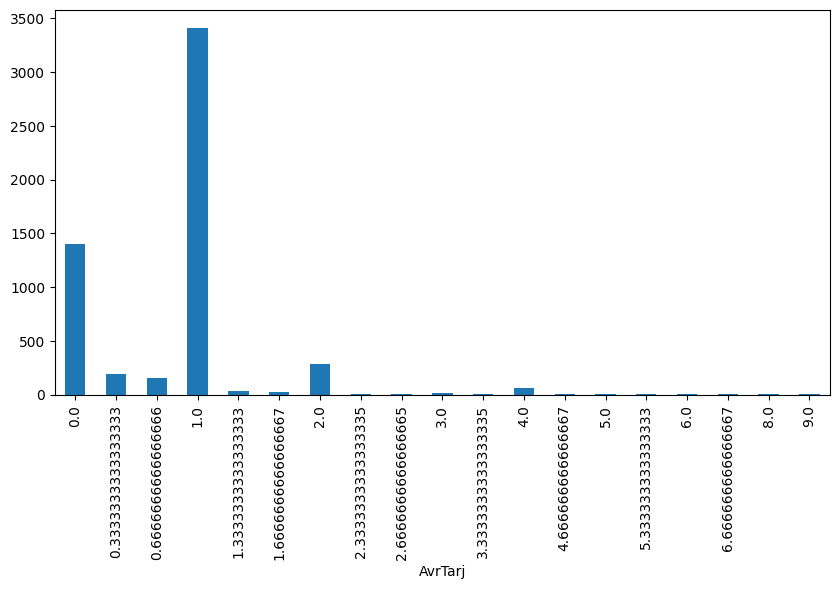

In [ ]:
data_set['AvrTarj'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.xlabel('AvrTarj')
plt.show()

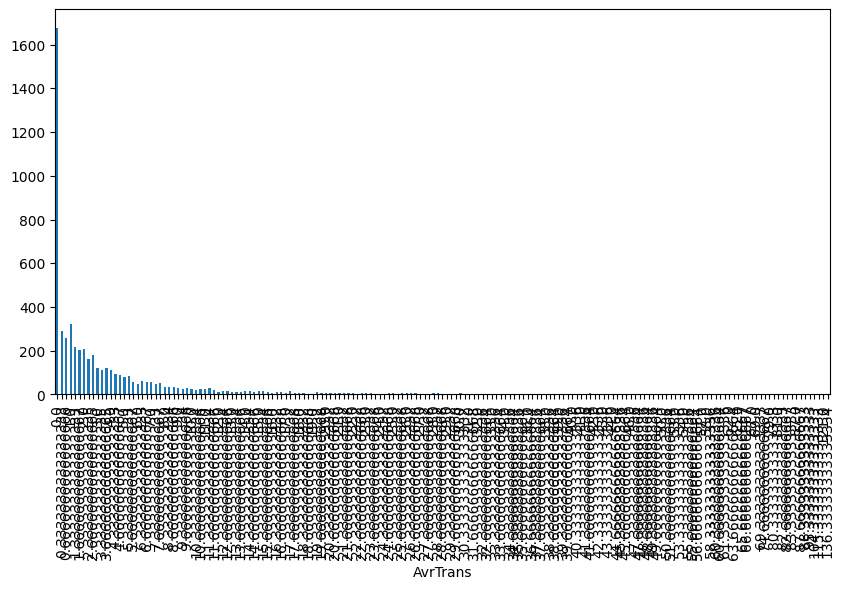

In [ ]:
data_set['AvrTrans'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.xlabel('AvrTrans')
plt.show()

In [ ]:
print(data_set)

        Ingreso  Edad Telefono NivelEduc Genero EstCivil Region FUGA  \
0     1050050.0  30.0       SI       UNI      M      SOL     RM   NF   
1      830600.0  38.0       SI       TEC      F      CAS     RM   NF   
2      980700.0  25.0       SI       UNI      F      SOL     RM   NF   
3     1178300.0  46.0       SI       TEC      M      CAS     RM   NF   
4      868600.0  55.0       SI       MED      F      SOL     RM   NF   
...         ...   ...      ...       ...    ...      ...    ...  ...   
5600   972150.0  26.0       SI       UNI      F      SOL     RM    F   
5601   992100.0  33.0       SI       UNI      M      SOL     RM    F   
5602   851500.0  30.0       SI       TEC      M      CAS     RM    F   
5603  3693900.0  58.0       SI       UNI      F      VIU     RM    F   
5604   866700.0  20.0       SI       UNI      M      SOL     RM    F   

      AvrCredit   AvrTarj  AvrTrans        AvrMarg  
0      768800.0  2.000000  0.333333  226914.285714  
1      765350.0  0.000000  0.

In [ ]:
data_set.isnull().sum()

Ingreso      0
Edad         0
Telefono     0
NivelEduc    0
Genero       0
EstCivil     0
Region       0
FUGA         0
AvrCredit    0
AvrTarj      0
AvrTrans     0
AvrMarg      0
dtype: int64

In [ ]:
data_set.describe(include='all') 

,Ingreso,Edad,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA,AvrCredit,AvrTarj,AvrTrans,AvrMarg
count,5.605000e+03,5605.000000,5605,5605,5605,5605,5605,5605,5.605000e+03,5605.000000,5605.000000,5605.000000
unique,NaN,NaN,1,4,2,4,1,2,NaN,NaN,NaN,NaN
top,NaN,NaN,SI,UNI,M,CAS,RM,NF,NaN,NaN,NaN,NaN
freq,NaN,NaN,5605,3630,3924,2962,5605,4889,NaN,NaN,NaN,NaN
mean,1.224165e+06,35.882248,NaN,NaN,NaN,NaN,NaN,NaN,7.460282e+05,0.832649,4.655962,227297.032242
std,5.615087e+05,9.048508,NaN,NaN,NaN,NaN,NaN,NaN,1.012554e+05,0.701522,9.221495,871.071360
min,0.000000e+00,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.375500e+05,0.000000,0.000000,203637.142857
25%,8.914000e+05,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.172000e+05,0.333333,0.000000,227045.714286
50%,1.057650e+06,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.242500e+05,1.000000,1.666667,227180.000000
75%,1.362600e+06,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.395500e+05,1.000000,5.000000,227485.714286


## Transformamos los datos a una nueva escala

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ingreso    5605 non-null   float64
 1   Edad       5605 non-null   float64
 2   Telefono   5605 non-null   object 
 3   NivelEduc  5605 non-null   object 
 4   Genero     5605 non-null   object 
 5   EstCivil   5605 non-null   object 
 6   Region     5605 non-null   object 
 7   FUGA       5605 non-null   object 
 8   AvrCredit  5605 non-null   float64
 9   AvrTarj    5605 non-null   float64
 10  AvrTrans   5605 non-null   float64
 11  AvrMarg    5605 non-null   float64
dtypes: float64(6), object(6)
memory usage: 525.6+ KB


Primero vemos la distribución de variables asimétricas graficandolas

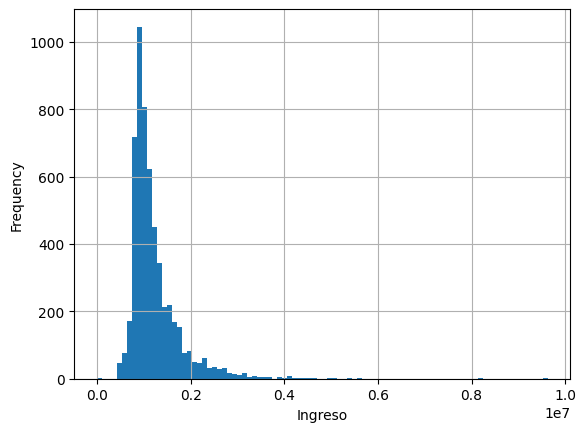

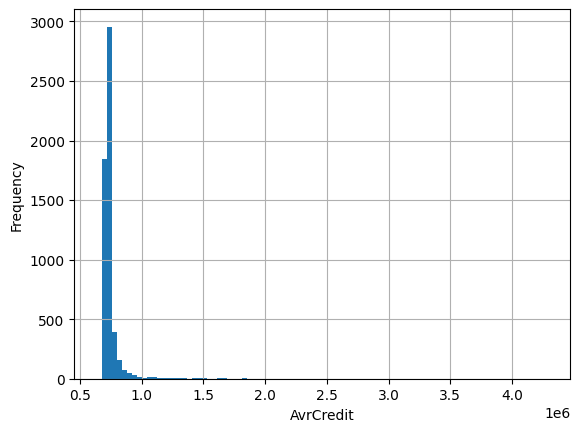

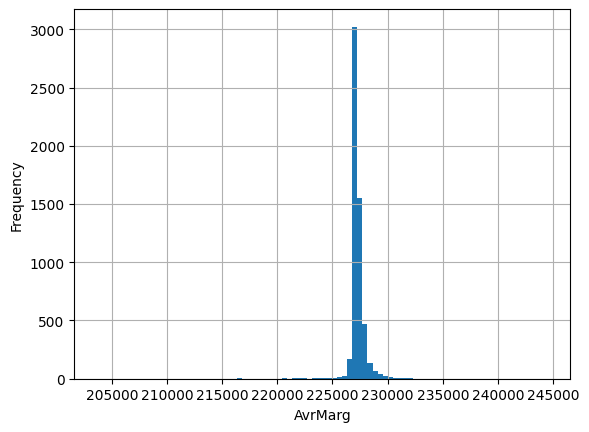

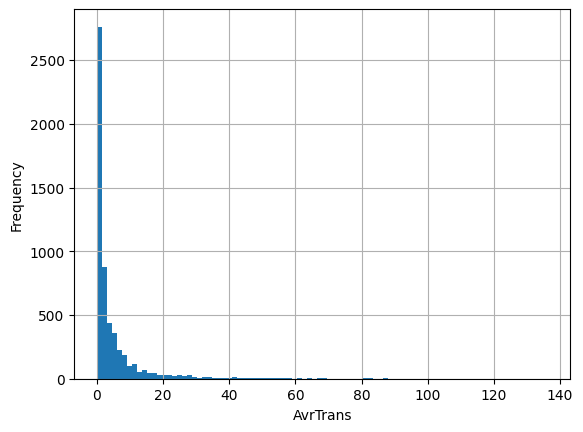

In [ ]:
data_set['Ingreso'].plot(kind='hist',bins=90, grid=True)
plt.xlabel('Ingreso')
plt.show()
data_set['AvrCredit'].plot(kind='hist',bins=90, grid=True)
plt.xlabel('AvrCredit')
plt.show()
data_set['AvrMarg'].plot(kind='hist',bins=90, grid=True)
plt.xlabel('AvrMarg')
plt.show()
data_set['AvrTrans'].plot(kind='hist',bins=90, grid=True)
plt.xlabel('AvrTrans')
plt.show()

Como vemos todas las variable estan concentradas en un intervalo, por lo que le aplicamos su logaritmo, solo en las variables financiaeras. Marg, Credit e Ingreso. En numero de tarjetas y transacciones, dejamos el promedio al ser discretas

In [ ]:
data_set['LnMargen'] = np.log(data_set['AvrMarg']+1)
data_set['LnCredit'] = np.log(data_set['AvrCredit']+1)
data_set['LnIngreso'] = np.log(data_set['Ingreso']+1)

Se crearon 3 columnas nuevas: LnIngreso LnMargen, LnTrans y LnCredit. Borramos AvrMarg, AvrCredit, Ingreso

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ingreso    5605 non-null   float64
 1   Edad       5605 non-null   float64
 2   Telefono   5605 non-null   object 
 3   NivelEduc  5605 non-null   object 
 4   Genero     5605 non-null   object 
 5   EstCivil   5605 non-null   object 
 6   Region     5605 non-null   object 
 7   FUGA       5605 non-null   object 
 8   AvrCredit  5605 non-null   float64
 9   AvrTarj    5605 non-null   float64
 10  AvrTrans   5605 non-null   float64
 11  AvrMarg    5605 non-null   float64
 12  LnMargen   5605 non-null   float64
 13  LnCredit   5605 non-null   float64
 14  LnIngreso  5605 non-null   float64
dtypes: float64(9), object(6)
memory usage: 657.0+ KB


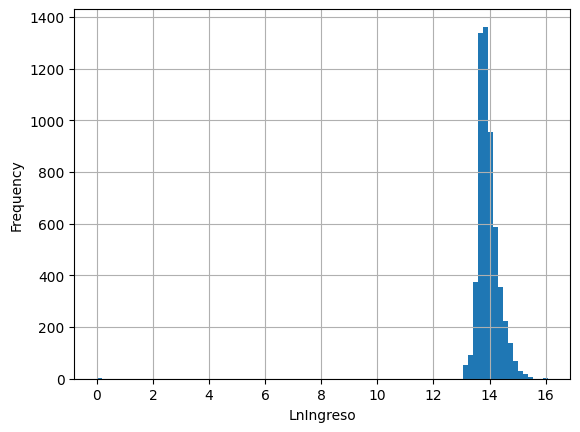

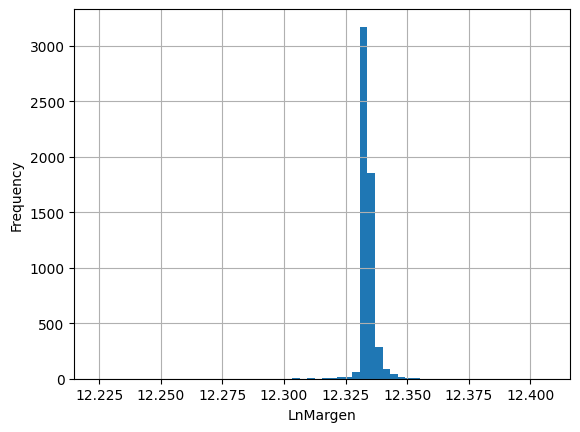

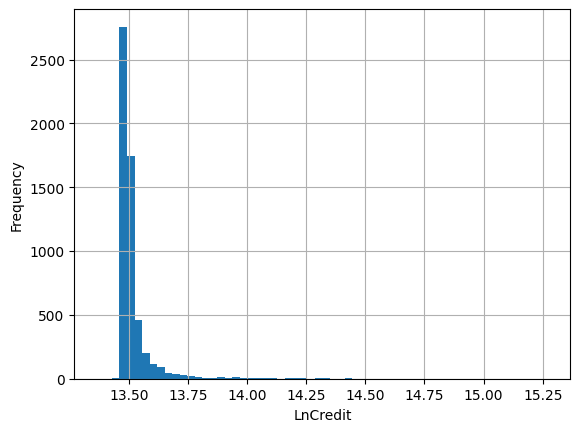

In [ ]:
data_set['LnIngreso'].plot(kind='hist',bins=90, grid=True)
plt.xlabel('LnIngreso')
plt.show()
data_set['LnMargen'].plot(kind='hist',bins=60, grid=True )
plt.xlabel('LnMargen')
plt.show()
data_set['LnCredit'].plot(kind='hist',bins=60, grid=True )
plt.xlabel('LnCredit')
plt.show()

A pesar de que siguen concentradas, nos quedamos con el ln, y borramos las otras. Borramos las que usamos para sacar el Ln

In [ ]:
del data_set['AvrMarg']
del data_set['AvrCredit']
del data_set['Ingreso']

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       5605 non-null   float64
 1   Telefono   5605 non-null   object 
 2   NivelEduc  5605 non-null   object 
 3   Genero     5605 non-null   object 
 4   EstCivil   5605 non-null   object 
 5   Region     5605 non-null   object 
 6   FUGA       5605 non-null   object 
 7   AvrTarj    5605 non-null   float64
 8   AvrTrans   5605 non-null   float64
 9   LnMargen   5605 non-null   float64
 10  LnCredit   5605 non-null   float64
 11  LnIngreso  5605 non-null   float64
dtypes: float64(6), object(6)
memory usage: 525.6+ KB


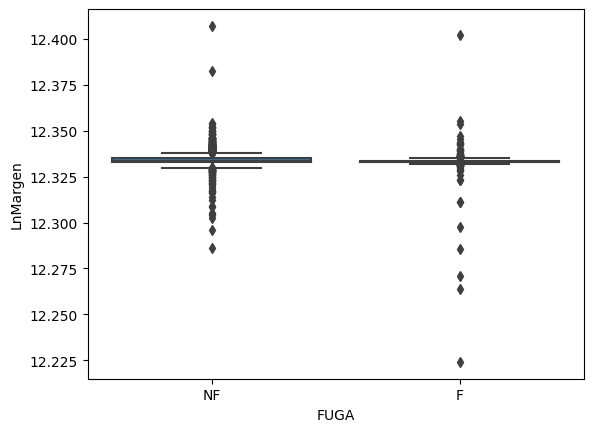

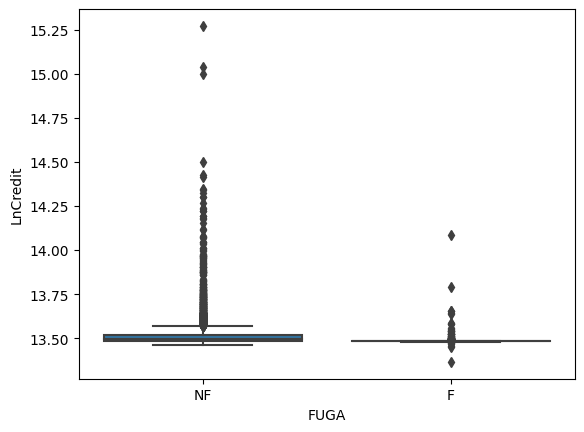

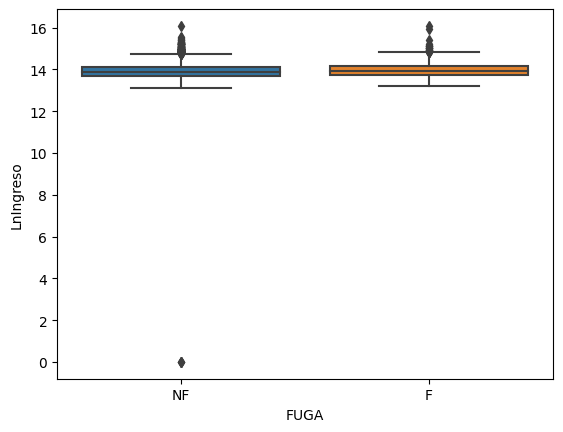

In [ ]:
sn.boxplot(x="FUGA", y="LnMargen", data=data_set) 
plt.show()
sn.boxplot(x="FUGA", y="LnCredit", data=data_set) 
plt.show()
sn.boxplot(x="FUGA", y="LnIngreso", data=data_set) 
plt.show()

## Agregación 

Para la variable Education agruparemos sus datos para reducir sus clases. Por lo tanto, uniremos dos clases en una, cuando la variable toma el valor de educación superior completa y postgrado, como se muestra en el ejemplo a continuación:

*TEC + UNI = Completa*

Analizaremos si hacemos esto *EST_UNI  = Incompleta*

Lo que se traduce en el código:

In [ ]:
data_set['NivelEduc'] = data_set['NivelEduc'].replace('TEC', 'Completa')
data_set['NivelEduc'] = data_set['NivelEduc'].replace('UNI', 'Completa')
data_set['NivelEduc'] = data_set['NivelEduc'].replace('EST_UNI', 'Incompleta')
data_set['NivelEduc'] = data_set['NivelEduc'].replace('MED', 'Incompleta')

Lo mismo para estado civil, pues habian muy poco porcentaje de viudos, por los que se juntan con los divorciados y se crea categoria OTRO.

In [ ]:
data_set['EstCivil'] = data_set['EstCivil'].replace('VIU', 'OTRO')
data_set['EstCivil'] = data_set['EstCivil'].replace('DIV', 'OTRO')

En la variable Genero, por error algunas variables 'M' fueron escritas como 'H', asi que reemplazamos la variable 'H' por la 'M'

In [ ]:
data_set['Genero'] = data_set['Genero'].replace('H', 'M')

In [ ]:
data_set.describe(include='all') 

,Edad,Telefono,NivelEduc,Genero,EstCivil,Region,FUGA,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso
count,5605.000000,5605,5605,5605,5605,5605,5605,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000
unique,NaN,1,2,2,3,1,2,NaN,NaN,NaN,NaN,NaN
top,NaN,SI,Completa,M,CAS,RM,NF,NaN,NaN,NaN,NaN,NaN
freq,NaN,5605,5423,3924,2962,5605,4889,NaN,NaN,NaN,NaN,NaN
mean,35.882248,NaN,NaN,NaN,NaN,NaN,NaN,0.832649,4.655962,12.334010,13.517679,13.939447
std,9.048508,NaN,NaN,NaN,NaN,NaN,NaN,0.701522,9.221495,0.003863,0.086665,0.478841
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,12.224100,13.365390,0.000000
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.000000,12.332911,13.483111,13.700550
50%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.666667,12.333502,13.492893,13.871561
75%,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,12.334847,13.513799,14.124906


## Transformamos los datos a variables binarias

Transformamos las variables categóricas de la base de datos a variables binarias. Al momento de hacer esto, observaremos que las variables que tienen categoria unica, al no presentar desviacion, van a ser eliminadas al momento de transformarlas a binarias.

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Edad       5605 non-null   float64
 1   Telefono   5605 non-null   object 
 2   NivelEduc  5605 non-null   object 
 3   Genero     5605 non-null   object 
 4   EstCivil   5605 non-null   object 
 5   Region     5605 non-null   object 
 6   FUGA       5605 non-null   object 
 7   AvrTarj    5605 non-null   float64
 8   AvrTrans   5605 non-null   float64
 9   LnMargen   5605 non-null   float64
 10  LnCredit   5605 non-null   float64
 11  LnIngreso  5605 non-null   float64
dtypes: float64(6), object(6)
memory usage: 525.6+ KB


Para transformar todas las variables categóricas de la base de datos a variables binarias

In [ ]:
#definimos otro data_set para poder ejecutar los dos codigos, de lo contrario no habra variables que transformar en el siguiente ejemplo
data_set_T = data_set 
data_set_T = pd.get_dummies(data_set_T, drop_first= True)
data_set_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  5605 non-null   float64
 1   AvrTarj               5605 non-null   float64
 2   AvrTrans              5605 non-null   float64
 3   LnMargen              5605 non-null   float64
 4   LnCredit              5605 non-null   float64
 5   LnIngreso             5605 non-null   float64
 6   NivelEduc_Incompleta  5605 non-null   uint8  
 7   Genero_M              5605 non-null   uint8  
 8   EstCivil_OTRO         5605 non-null   uint8  
 9   EstCivil_SOL          5605 non-null   uint8  
 10  FUGA_NF               5605 non-null   uint8  
dtypes: float64(6), uint8(5)
memory usage: 290.2 KB


Lo que queremos es transformar VARIABLES  categóricas específicas de la base datos a variable binaria, ya que al cambiarlas todas, variables como telefono o region no aparecen en la informacio de la data.

In [ ]:
data_set = pd.get_dummies(data_set, columns = ["FUGA"], drop_first=True)
data_set = pd.get_dummies(data_set, columns = ["NivelEduc"], drop_first=True)
data_set = pd.get_dummies(data_set, columns = ["Genero"], drop_first=True)
data_set = pd.get_dummies(data_set, columns = ["EstCivil"], drop_first=True)
data_set = pd.get_dummies(data_set, columns = ["Telefono"])
data_set = pd.get_dummies(data_set, columns = ["Region"])
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  5605 non-null   float64
 1   AvrTarj               5605 non-null   float64
 2   AvrTrans              5605 non-null   float64
 3   LnMargen              5605 non-null   float64
 4   LnCredit              5605 non-null   float64
 5   LnIngreso             5605 non-null   float64
 6   FUGA_NF               5605 non-null   uint8  
 7   NivelEduc_Incompleta  5605 non-null   uint8  
 8   Genero_M              5605 non-null   uint8  
 9   EstCivil_OTRO         5605 non-null   uint8  
 10  EstCivil_SOL          5605 non-null   uint8  
 11  Telefono_SI           5605 non-null   uint8  
 12  Region_RM             5605 non-null   uint8  
dtypes: float64(6), uint8(7)
memory usage: 301.2 KB


In [ ]:
data_set.describe(include='all') 

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,FUGA_NF,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL,Telefono_SI,Region_RM
count,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.0,5605.0
mean,35.882248,0.832649,4.655962,12.334010,13.517679,13.939447,0.872257,0.032471,0.700089,0.051918,0.419625,1.0,1.0
std,9.048508,0.701522,9.221495,0.003863,0.086665,0.478841,0.333833,0.177263,0.458260,0.221881,0.493542,0.0,0.0
min,15.000000,0.000000,0.000000,12.224100,13.365390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,29.000000,0.333333,0.000000,12.332911,13.483111,13.700550,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
50%,33.000000,1.000000,1.666667,12.333502,13.492893,13.871561,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0
75%,41.000000,1.000000,5.000000,12.334847,13.513799,14.124906,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,1.0
max,80.000000,9.000000,136.333333,12.407103,15.271844,16.080243,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


## Normalización

La normalización consiste en estandarizar la base de datos para igualar el tratamiento de cada variable. Se ve despues

In [ ]:
#data_set_scaled = MinMaxScaler()
#data_set_scaled = pd.DataFrame(data_set_scaled.fit_transform(data_set), columns = data_set.columns)

## Discretización

In [ ]:
data_set.describe(include='all') 

,Edad,AvrTarj,AvrTrans,LnMargen,LnCredit,LnIngreso,FUGA_NF,NivelEduc_Incompleta,Genero_M,EstCivil_OTRO,EstCivil_SOL,Telefono_SI,Region_RM
count,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.000000,5605.0,5605.0
mean,35.882248,0.832649,4.655962,12.334010,13.517679,13.939447,0.872257,0.032471,0.700089,0.051918,0.419625,1.0,1.0
std,9.048508,0.701522,9.221495,0.003863,0.086665,0.478841,0.333833,0.177263,0.458260,0.221881,0.493542,0.0,0.0
min,15.000000,0.000000,0.000000,12.224100,13.365390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,29.000000,0.333333,0.000000,12.332911,13.483111,13.700550,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
50%,33.000000,1.000000,1.666667,12.333502,13.492893,13.871561,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0
75%,41.000000,1.000000,5.000000,12.334847,13.513799,14.124906,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,1.0
max,80.000000,9.000000,136.333333,12.407103,15.271844,16.080243,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


La discretización consiste en transformar las variables continuas a variables categóricas. Con esto aumentamos las variables para crear mejor discriminacion de ellas.

**Discretizamos la variable Edad, LnMargen, LnCredit, LnIngreso,**

Hay que establecer un criterio para dividir las variables, en este caso lo haremos por cuantiles. Lo Haremos para la variable Edad, LnMargen, LnCredit, LnIngreso.

Definimos los puntos de división a utilizar y discretizamos.

Para 'Edad'



In [ ]:
cut_points = data_set['Edad'].quantile([0, .2, .4, .6, .8, 1])
Edad_binned = pd.cut(data_set['Edad'], bins=cut_points, include_lowest=True ) # bins puede ser un int tambien con el numero de divisiones en el intervalo y en base a eso lo divide
print(Edad_binned) #el array es como quiero dividir los datos

0         (29.0, 32.0]
1         (36.0, 43.0]
2       (14.999, 29.0]
3         (43.0, 80.0]
4         (43.0, 80.0]
             ...      
5600    (14.999, 29.0]
5601      (32.0, 36.0]
5602      (29.0, 32.0]
5603      (43.0, 80.0]
5604    (14.999, 29.0]
Name: Edad, Length: 5605, dtype: category
Categories (5, interval[float64, right]): [(14.999, 29.0] < (29.0, 32.0] < (32.0, 36.0] <
                                           (36.0, 43.0] < (43.0, 80.0]]


Entonces Edad_binned será la variable Edad discretizada.

**Discretizamos la variable LnMargen**

In [ ]:
cut_points = data_set['LnMargen'].quantile([0, .2, .4, .6, .8, 1]) 
LnMargen_binned = pd.cut(data_set['LnMargen'], bins =cut_points, include_lowest= True )
print(LnMargen_binned)

0        (12.224, 12.3328]
1        (12.3332, 12.334]
2        (12.224, 12.3328]
3        (12.334, 12.3352]
4        (12.334, 12.3352]
               ...        
5600    (12.3328, 12.3332]
5601     (12.224, 12.3328]
5602    (12.3328, 12.3332]
5603    (12.3352, 12.4071]
5604    (12.3328, 12.3332]
Name: LnMargen, Length: 5605, dtype: category
Categories (5, interval[float64, right]): [(12.224, 12.3328] < (12.3328, 12.3332] < (12.3332, 12.334] <
                                           (12.334, 12.3352] < (12.3352, 12.4071]]


**Discretizamos la variable LnCredit**

In [ ]:
cut_points = data_set['LnCredit'].quantile([0, .2, .4, .6, .8, 1]) 
LnCredit_binned = pd.cut(data_set['LnCredit'], bins =cut_points, include_lowest= True )
print(LnCredit_binned)

0       (13.523, 15.272]
1       (13.523, 15.272]
2       (13.523, 15.272]
3       (13.482, 13.488]
4         (13.5, 13.523]
              ...       
5600    (13.364, 13.482]
5601    (13.364, 13.482]
5602    (13.364, 13.482]
5603    (13.364, 13.482]
5604    (13.364, 13.482]
Name: LnCredit, Length: 5605, dtype: category
Categories (5, interval[float64, right]): [(13.364, 13.482] < (13.482, 13.488] < (13.488, 13.5] <
                                           (13.5, 13.523] < (13.523, 15.272]]


**Discretizamos la variable LnIngreso**

In [ ]:
cut_points = data_set['LnIngreso'].quantile([0, .2, .4, .6, .8, 1]) 
LnIngreso_binned = pd.cut(data_set['LnIngreso'], bins =cut_points, include_lowest= True )
print(LnIngreso_binned)

0       (13.803, 13.953]
1       (-0.001, 13.674]
2       (13.674, 13.803]
3       (13.953, 14.212]
4       (13.674, 13.803]
              ...       
5600    (13.674, 13.803]
5601    (13.803, 13.953]
5602    (-0.001, 13.674]
5603     (14.212, 16.08]
5604    (-0.001, 13.674]
Name: LnIngreso, Length: 5605, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 13.674] < (13.674, 13.803] < (13.803, 13.953] <
                                           (13.953, 14.212] < (14.212, 16.08]]


Se puede intentar con AvrTrans y AvrTarj para veificar que ocurre

In [ ]:
cut_points = data_set['AvrTrans'].quantile([0, .2, .4, .6, .8, 1]) 
AvrTrans_binned = pd.cut(data_set['AvrTrans'], bins =cut_points, include_lowest= True )
print(AvrTrans_binned) 

ValueError: ignored

In [ ]:
cut_points = data_set['AvrTarj'].quantile([0, .2, .4, .6, .8, 1]) 
AvrTarj_binned = pd.cut(data_set['AvrTarj'], bins =cut_points, include_lowest= True )
print(AvrTarj_binned)

ValueError: ignored

Nos aparece error ya que para discretizar una variable es necesario tome varios valores para poder separarlas en categorias. La variable que estamos intentado discretizar toma muy pocos valores distintos y por lo tanto no hay datos suficientes para crear 5 intervalos

# Filtros (Selección de atributos)

Los filtros se utilizan para elegir un subconjunto de variables relevantes, eliminando las que generan ruido y confunden al modelo.

Existen 3 criterios:

## Inutilidad

Este criterio consiste en encontrar las variables muy concentradas dentro de la base de datos. 

Para esto calculamos la desviación estándar de las variables:

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  5605 non-null   float64
 1   AvrTarj               5605 non-null   float64
 2   AvrTrans              5605 non-null   float64
 3   LnMargen              5605 non-null   float64
 4   LnCredit              5605 non-null   float64
 5   LnIngreso             5605 non-null   float64
 6   FUGA_NF               5605 non-null   uint8  
 7   NivelEduc_Incompleta  5605 non-null   uint8  
 8   Genero_M              5605 non-null   uint8  
 9   EstCivil_OTRO         5605 non-null   uint8  
 10  EstCivil_SOL          5605 non-null   uint8  
 11  Telefono_SI           5605 non-null   uint8  
 12  Region_RM             5605 non-null   uint8  
dtypes: float64(6), uint8(7)
memory usage: 301.2 KB


In [ ]:
data_set.std()

Edad                    9.048508
AvrTarj                 0.701522
AvrTrans                9.221495
LnMargen                0.003863
LnCredit                0.086665
LnIngreso               0.478841
FUGA_NF                 0.333833
NivelEduc_Incompleta    0.177263
Genero_M                0.458260
EstCivil_OTRO           0.221881
EstCivil_SOL            0.493542
Telefono_SI             0.000000
Region_RM               0.000000
dtype: float64

In [ ]:
del data_set['Telefono_SI']
del data_set['Region_RM']

## Redundancia

Este criterio consiste en encontrar las variables que estan muy correlacionadas porque entregan resultados similares.

Calculamos la matriz de correlación entre todas las variables de la base de datos:

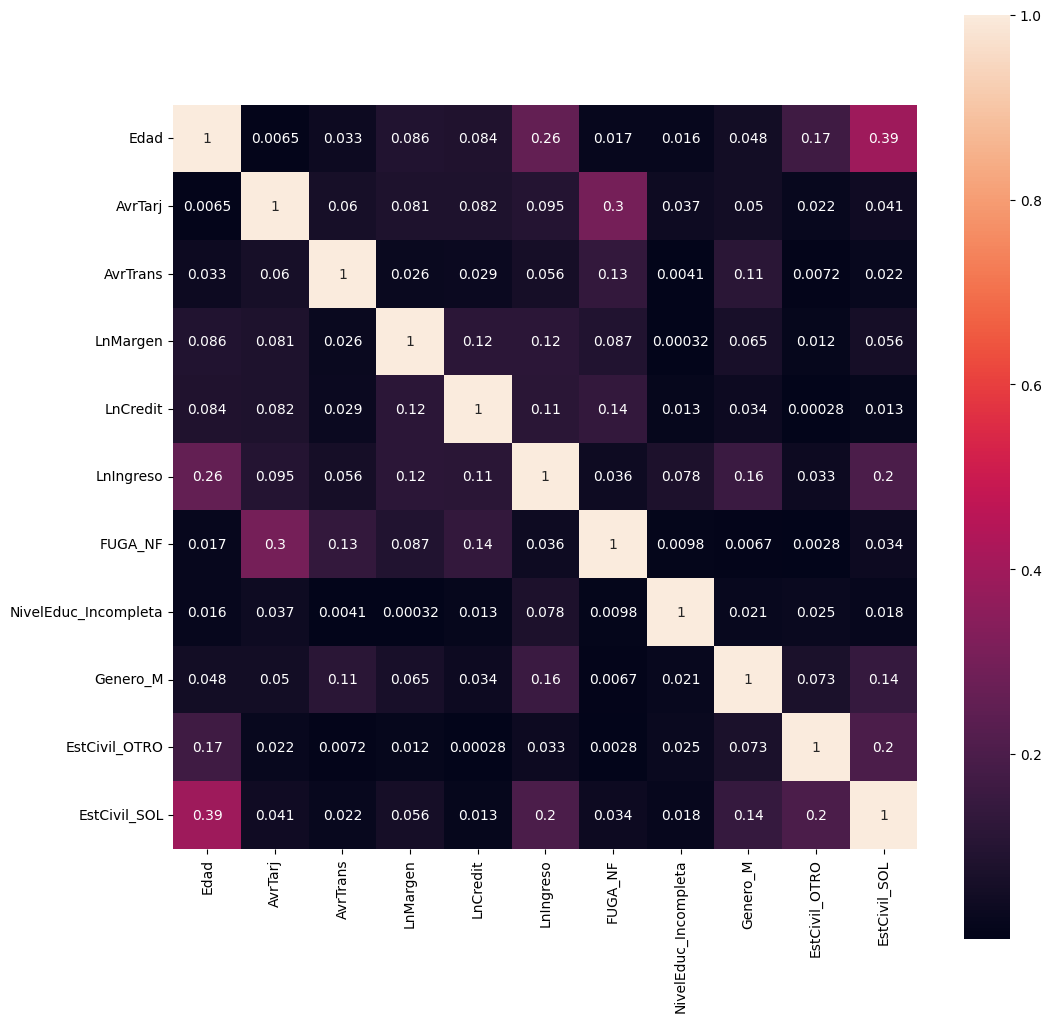

In [ ]:
corrmat = data_set.corr().abs()
f, ax = plt.subplots(figsize=(12, 12))
sn.heatmap(corrmat, annot = True, square=True);

El criterio consiste en que si existe un valor entre 0.9 y 1 existe redundancia. Observar que todas las variables existentes no presentan redundancia entre ellas ya que ninguna entrega un resultado similar a otra. Esto conlleva a omitir el test chi cuadrado pues todas las variables son relevantes.

## Relevancia

Finalmente este criterio consiste en ver que variables son mas relevantes para predecir la variable objetivo.

Utilizaremos el test chi cuadrado que calcula la relación entre dos variables nominales.

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  5605 non-null   float64
 1   AvrTarj               5605 non-null   float64
 2   AvrTrans              5605 non-null   float64
 3   LnMargen              5605 non-null   float64
 4   LnCredit              5605 non-null   float64
 5   LnIngreso             5605 non-null   float64
 6   FUGA_NF               5605 non-null   uint8  
 7   NivelEduc_Incompleta  5605 non-null   uint8  
 8   Genero_M              5605 non-null   uint8  
 9   EstCivil_OTRO         5605 non-null   uint8  
 10  EstCivil_SOL          5605 non-null   uint8  
dtypes: float64(6), uint8(5)
memory usage: 290.2 KB


**Calculamos la relación entre la variable Edad y fuga**

Para poder realizar el test tenemos que utilizar dos variables categóricas, por lo que ocupamos la variable Edad discretizada.


Creamos la tabla de contingencia entre las dos variables:

In [ ]:
tbl = pd.crosstab(index=Edad_binned,columns=data_set['FUGA_NF'])
print(tbl)

FUGA_NF           0     1
Edad                     
(14.999, 29.0]  186  1293
(29.0, 32.0]    125   911
(32.0, 36.0]    132   894
(36.0, 43.0]    128   917
(43.0, 80.0]    145   874


Realizamos el test chi cuadrado a partir de la tabla y obtenemos sus resultados:

In [ ]:
stat, p, dof, expected = chi2_contingency(tbl)
# Para imrpimir los resultados del test
print('Pearsons Chi-squared test')
print('X-squared = %d' % stat) 
print('P-value =%f' % p)
print('dof = %d' % dof)

Pearsons Chi-squared test
X-squared = 2
P-value =0.605249
dof = 4


**Calculamos la relación entre la variable LnMargen y FUGA**

Hacemos el mismo análisis anterior.

In [ ]:
tbl1 = pd.crosstab(index=LnMargen_binned, columns=data_set['FUGA_NF'])
print(tbl1)
stat, p, dof, expected = chi2_contingency(tbl1)
print('Pearsons Chi-squared test')
print('X-squared = %d' % stat) 
print('P-value =%f' % p)
print('dof = %d' % dof)

FUGA_NF               0     1
LnMargen                     
(12.224, 12.3328]   139  1000
(12.3328, 12.3332]  286   831
(12.3332, 12.334]   134   977
(12.334, 12.3352]    87  1035
(12.3352, 12.4071]   70  1046
Pearsons Chi-squared test
X-squared = 233
P-value =0.000000
dof = 4


**Calculamos la relación entre la variable LnCredit y FUGA**

In [ ]:
tbl1 = pd.crosstab(index=LnCredit_binned, columns=data_set['FUGA_NF'])
print(tbl1)
stat, p, dof, expected = chi2_contingency(tbl1)
print('Pearsons Chi-squared test')
print('X-squared = %d' % stat) 
print('P-value =%f' % p)
print('dof = %d' % dof)

FUGA_NF             0     1
LnCredit                   
(13.364, 13.482]  519   621
(13.482, 13.488]  123  1005
(13.488, 13.5]     40  1066
(13.5, 13.523]     14  1098
(13.523, 15.272]   20  1099
Pearsons Chi-squared test
X-squared = 1437
P-value =0.000000
dof = 4


**Calculamos la relación entre la variable LnIngreso y FUGA**


In [ ]:
tbl1 = pd.crosstab(index=LnIngreso_binned, columns=data_set['FUGA_NF'])
print(tbl1)
stat, p, dof, expected = chi2_contingency(tbl1)
print('Pearsons Chi-squared test')
print('X-squared = %d' % stat) 
print('P-value =%f' % p)
print('dof = %d' % dof)

FUGA_NF             0     1
LnIngreso                  
(-0.001, 13.674]  129  1045
(13.674, 13.803]  121   966
(13.803, 13.953]  155   950
(13.953, 14.212]  151   967
(14.212, 16.08]   160   961
Pearsons Chi-squared test
X-squared = 10
P-value =0.034955
dof = 4


Finalmente descartamos Address ya que es redundante y menos relevante que Age

**Selección de variables mas relevantes con test chi cuadrado**

Seleccionamos las 5 variables que tengan el estadístico chi cuadrado mayor, como se muestra a continuación:

Primero definimos como X las variables independientes y como Y la variable dependiente:

In [ ]:
X = data_set.loc[:, data_set.columns != 'FUGA_NF'] 
y = data_set.loc[:, data_set.columns == 'FUGA_NF']
X.shape

(5605, 10)

Ahora aplicamos la función SelectKBest con el test chi cuadrado para determinar las variables mas relevantes:

In [ ]:
X_new = SelectKBest(chi2, k=5).fit(X, y)
#para que devuleva una matriz con lo valores de las variables mas relevantes (numpy array) 
x_final = X_new.fit_transform(X,y) 
x_final.shape
print(x_final)

[[30.          2.          0.33333333  0.          1.        ]
 [38.          0.          0.66666667  0.          0.        ]
 [25.          1.          0.          0.          1.        ]
 ...
 [30.          0.          1.33333333  0.          0.        ]
 [58.          0.          0.          0.          0.        ]
 [20.          0.66666667  0.          0.          1.        ]]


Por último, podemos obtener los nombres de las columnas seleccionadas:

In [ ]:
kbest = np.asarray(X.columns)[X_new.get_support()]
print(kbest)

['Edad' 'AvrTarj' 'AvrTrans' 'NivelEduc_Incompleta' 'EstCivil_SOL']


descargar base de datos antes de normalizar

In [ ]:
data_set.to_excel('Base_Fuga_2021_NotScaled.xlsx')
!cp Base_Fuga_2021_NotScaled.xlsx "/content/gdrive/MyDrive/Colab Notebooks/Fundamentos Analytics/Tarea 1"

**Normalización**

In [ ]:

Default = data_set['FUGA_NF'] #porque default no se noramliza ya que es la variable objetivo
scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)
data_set_scaled['FUGA_NF'] = Default
print(data_set_scaled)

          Edad   AvrTarj  AvrTrans  LnMargen  LnCredit  LnIngreso  FUGA_NF  \
0     0.230769  0.222222  0.002445  0.591422  0.098192   0.862198        1   
1     0.353846  0.000000  0.004890  0.597611  0.095832   0.847618        1   
2     0.153846  0.111111  0.000000  0.580333  0.120531   0.857949        1   
3     0.476923  0.111111  0.000000  0.607018  0.063720   0.869364        1   
4     0.615385  0.111111  0.044010  0.601114  0.081556   0.850400        1   
...        ...       ...       ...       ...       ...        ...      ...   
5600  0.169231  0.000000  0.000000  0.594586  0.060761   0.857404        0   
5601  0.276923  0.111111  0.039120  0.571985  0.061200   0.858667        0   
5602  0.230769  0.000000  0.009780  0.595136  0.061090   0.849164        0   
5603  0.661538  0.000000  0.000000  0.654833  0.061200   0.940421        0   
5604  0.076923  0.074074  0.000000  0.594586  0.061310   0.850264        0   

      NivelEduc_Incompleta  Genero_M  EstCivil_OTRO  EstCivil_S